## Modules à importer

In [1]:
import math
import scipy
import pickle
import numpy as np
import pandas as pd
import iminuit as im
import ipywidgets as ipw
from variaIa import tools_ar
#from variaIa import tools_ar_sc
from importlib import reload
from variaIa import stretchevol
from variaIa.tools_ar import surveys, df_cons, df_nc, df_c, df_full, z_max
#from variaIa.tools_ar_sc import surveys, df_cons, df_nc, df_c, df_full, z_max
from IPython.display import display, Latex
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from mpl_toolkits import mplot3d
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "EB Garamond",
    "axes.labelsize": 'x-large',
    "xtick.labelsize": 'x-large',
    "ytick.labelsize": 'x-large'})
import random

## Définitions pandas, surveys et sélection de l'échantillon à utiliser

### Définition des données à montrer

In [2]:
def set_survey(cons, su):
    global df
    if su == 'All':
        df = df_cons(cons)
    elif 'n' in su:
        df = df_cons(cons)[df_cons(cons)['survey'] != su.split('n')[-1]]
    else:
        df = df_cons(cons)[df_cons(cons)['survey'] == su]
    return df

int_set_su = ipw.interactive(set_survey, cons=tools_ar.cons, su=tools_ar.su)
#int_set_su = ipw.interactive(set_survey, cons=tools_ar_sc.cons, su=tools_ar_sc.su)
display(int_set_su)

smap = plt.cm.get_cmap('cividis')
colors = {'SNF': plt.cm.binary(0.9),
          'SDSS': smap(0.1),
          'PS1': smap(0.5),
          'SNLS': smap(0.8),
          'HST': smap(0.99),  # for cividis
          #'HST': smap(300)}  # for viridis
          'All': (255/255, 51/255, 0/255)} 

def alphacolors(alpha, survey):
    return(colors[survey][0], colors[survey][1], colors[survey][2], alpha)

df_nHST = df_nc[df_nc['survey'] != 'HST']
surveysnl = surveys[0:1]+surveys[2:]

interactive(children=(Checkbox(value=False, description='Conservative'), Dropdown(description='Survey:', index…

## Minimisation des modèles à mettre dans le _pandas_

In [30]:
########################################### Evol Simple

evol1G1M1S = stretchevol.Evol1G1M1S(df)

print('1G1M1S')

evol1G1M1S.minimize()
#evol1G1M1S.show_model_tot()

########################################### Evol Kessler

evol1G1M2S = stretchevol.Evol1G1M2S(df)

print('1G1M2S')

evol1G1M2S.minimize()
#evol1G1M2S.show_model_tot()

########################################### Evol Howell

evol2G2M2S = stretchevol.Evol2G2M2S(df)

print('2G2M2S')

evol2G2M2S.minimize()
#evol2G2M2S.scatter()

########################################### Evol Howell Fixed

evol2G2M2SF = stretchevol.Evol2G2M2SF(df)

print('2G2M2SF')

evol2G2M2SF.minimize()
#evol2G2M2SF.scatter()

########################################### Evol Howell Z

evol2G2M2Sz = stretchevol.Evol2G2M2S(df, py=False)

print('2G2M2Sz')

evol2G2M2Sz.minimize()
#evol2G2M2S.scatter()

########################################### Evol Howell Fixed Z

evol2G2M2SFz = stretchevol.Evol2G2M2SF(df, py=False)

print('2G2M2SFz')

evol2G2M2SFz.minimize()
#evol2G2M2SF.scatter()

########################################### Evol NR 1S

evol3G2M1S = stretchevol.Evol3G2M1S(df)

print('3G2M1S')

evol3G2M1S.minimize()

########################################### Evol NR 2S z

evol3G2M1SF = stretchevol.Evol3G2M1SF(df)

print('3G2M1SF')

evol3G2M1SF.minimize()

########################################### Evol NR 2S

evol3G2M2S = stretchevol.Evol3G2M2S(df)

print('3G2M2S')

evol3G2M2S.minimize()
#evol3G2M2S.scatter()

########################################### Evol NR 2S z

evol3G2M2Sz = stretchevol.Evol3G2M2S(df, py=False)

print('3G2M2Sz')

evol3G2M2Sz.minimize()
#evol3G2M2S.scatter()

########################################### Evol NR 2S Fixed

evol3G2M2SF = stretchevol.Evol3G2M2SF(df)

print('3G2M2SF')

evol3G2M2SF.minimize(limits=[(0,1), None, None, None, None, None])
#evol3G2M2SF.scatter()

########################################### Evol NR 2S Fixed Z

evol3G2M2SFz = stretchevol.Evol3G2M2SF(df, py=False)

print('3G2M2SFz')

evol3G2M2SFz.minimize(limits=[(0,1), None, None, None, None, None])
#evol3G2M2SF.scatter()

########################################### Evol NR 3S

evol3G3M3S = stretchevol.Evol3G3M3S(df)

print('3G3M3S')

evol3G3M3S.minimize()

########################################### Evol NR 3S F

evol3G3M3SF = stretchevol.Evol3G3M3SF(df)

print('3G3M3SF')

evol3G3M3SF.minimize()

########################################### Evol NR 3S Z

evol3G3M3Sz = stretchevol.Evol3G3M3S(df, py=False)

print('3G3M3Sz')

evol3G3M3Sz.minimize()

########################################### Evol NR 4G2S

evol4G2M2S = stretchevol.Evol4G2M2S(df)

print('4G2M2S')

evol4G2M2S.minimize()

########################################### Evol NR 4G2S F

evol4G2M2SF = stretchevol.Evol4G2M2SF(df)

print('4G2M2SF')

evol4G2M2SF.minimize(limits=[(0,1), None, None, None, None, None, None])

########################################### Evol NR 4S

evol4G4M4S = stretchevol.Evol4G4M4S(df)

print('4G4M4S')

evol4G4M4S.minimize()

########################################### Evol NR 4S F

evol4G4M4SF = stretchevol.Evol4G4M4SF(df)

print('4G4M4SF')

evol4G4M4SF.minimize(limits=[(0,1), None, None, None, None, None, None, None, None, None, None])

########################################### Per Sample Asym
gen = stretchevol.generic()
gen.set_model('Evol1G1M2S')

assymSNF = gen.fit(set_survey(tools_ar.cons.value, 'SNF'))

assymPS1 = gen.fit(set_survey(tools_ar.cons.value, 'PS1'))

assymSDSS = gen.fit(set_survey(tools_ar.cons.value, 'SDSS'))

assymSNLS = gen.fit(set_survey(tools_ar.cons.value, 'SNLS'))

assymHST = gen.fit(set_survey(tools_ar.cons.value, 'HST'))

assymTOT = gen.fit(set_survey(tools_ar.cons.value, 'All'))

assym = {'SNF': assymSNF,
         'SDSS': assymSDSS,
         'PS1': assymPS1,
         'SNLS': assymSNLS,
         'HST': assymHST}

print('Per Sample')

1G1M1S
1G1M2S
2G2M2S
2G2M2SF
2G2M2Sz
2G2M2SFz
3G2M1S
3G2M1SF
3G2M2S
3G2M2Sz
3G2M2SF
3G2M2SFz
3G3M3S
3G3M3SF
3G3M3Sz
4G2M2S
4G2M2SF
4G4M4S
4G4M4SF
Per Sample


## Get proba

In [31]:
def get_proba(model):
    return np.exp((evol3G2M2S.get_aic() - model.get_aic())/2)

## Comparison dataframes

In [32]:
modèles = [evol4G4M4S, evol3G2M2S,
           evol3G3M3S, evol4G2M2S, evol2G2M2S, 
           evol1G1M2S, evol2G2M2SF, evol3G3M3SF,
           evol3G2M2SF, evol4G2M2SF,
           evol4G4M4SF, evol1G1M1S]

persample = [assym[k] for k in assym.keys()]

d_mod_comp = pd.DataFrame({'Name': [k.__doc__ for k in modèles[:-2]] +
                               ['Asym par échant.'] +
                               [k.__doc__ for k in modèles[-2:]],
                           'Fixed': [k.FIXED for k in modèles[:-2]] +
                               ['True'] +
                               [k.FIXED for k in modèles[-2:]],
                           'Free param': [len(k.FREEPARAMETERS) for k in modèles[:-2]] +
                               ['3x5'] +
                               [len(k.FREEPARAMETERS) for k in modèles[-2:]],
                           '$\mathcal{L}$': [round(k.get_logl(),1) for k in modèles[:-2]] +
                               [round(np.sum([k.get_logl() for k in persample]),1)] +
                               [round(k.get_logl(),1) for k in modèles[-2:]],
                           'AIC': [round(k.get_aic(),1) for k in modèles[:-2]] +
                               [round(np.sum([k.get_aic() for k in persample]),1)] +
                               [round(k.get_aic(),1) for k in modèles[-2:]],
                           '$\Delta$ AIC': [round(evol3G2M2S.get_aic()-k.get_aic(),1)
                                                for k in modèles[:-2]] +
                               [round(evol3G2M2S.get_aic()-np.sum([k.get_aic()
                                    for k in persample]),1)] +
                               [round(evol3G2M2S.get_aic()-k.get_aic(),1)
                                    for k in modèles[-2:]],
                           'Proba': [f'{get_proba(k):.1e}' for k in modèles[:-2]] +
                               [f'{np.exp((evol3G2M2S.get_aic()-np.sum([k.get_aic() for k in persample]))/2):.1e}'] +
                               [f'{get_proba(k):.1e}' for k in modèles[-2:]]
                          })

path = '../../../Data/tables/main_comp/df_comparaison'
if tools_ar.cons.value:
    path += '_cons'
#if tools_ar_sc.cons.value:
#    path += '_cons-supercut'
path += '_all.dat'
# path += '.dat'
#d_mod_comp.to_csv(path)

d_mod_comp

,Name,Fixed,Free param,$\mathcal{L}$,AIC,$\Delta$ AIC,Proba
0,"Base$+(\mu_1^{\rm O},\sigma_1^{\rm O})+(\mu_2^...",False,10,1440.5,1460.5,6.2,2.2e+01
1,Base,False,5,1456.7,1466.7,0.0,1.0e+00
2,"Base$+(\mu_1^{\rm O}, \sigma_1^{\rm O})$",False,7,1453.1,1467.1,-0.4,8.1e-01
3,"Base$+(\mu_2^{\rm Y}, \sigma_2^{\rm Y})$",False,6,1456.7,1468.7,-2.0,3.7e-01
4,Howell+dérive,False,4,1463.3,1471.3,-4.6,1.0e-01
5,Asymétrique,True,3,1485.2,1491.2,-24.5,4.7e-06
6,Howell+const,True,5,1484.2,1494.2,-27.5,1.0e-06
7,"Base$+(\mu_1^{\mathrm{O}}, \sigma_1^{\mathrm{O...",True,8,1478.9,1494.9,-28.2,7.5e-07
8,Base+const,True,6,1484.2,1496.2,-29.5,3.9e-07
9,"Base$+(\mu_2^{\rm Y}, \sigma_2^{\rm Y})$+const",True,7,1484.2,1498.2,-31.5,1.4e-07


In [10]:
d_mod_comp.to_latex('../../../../../Articles/2022-PhD/chapters/table_allmods.tex', index=False)

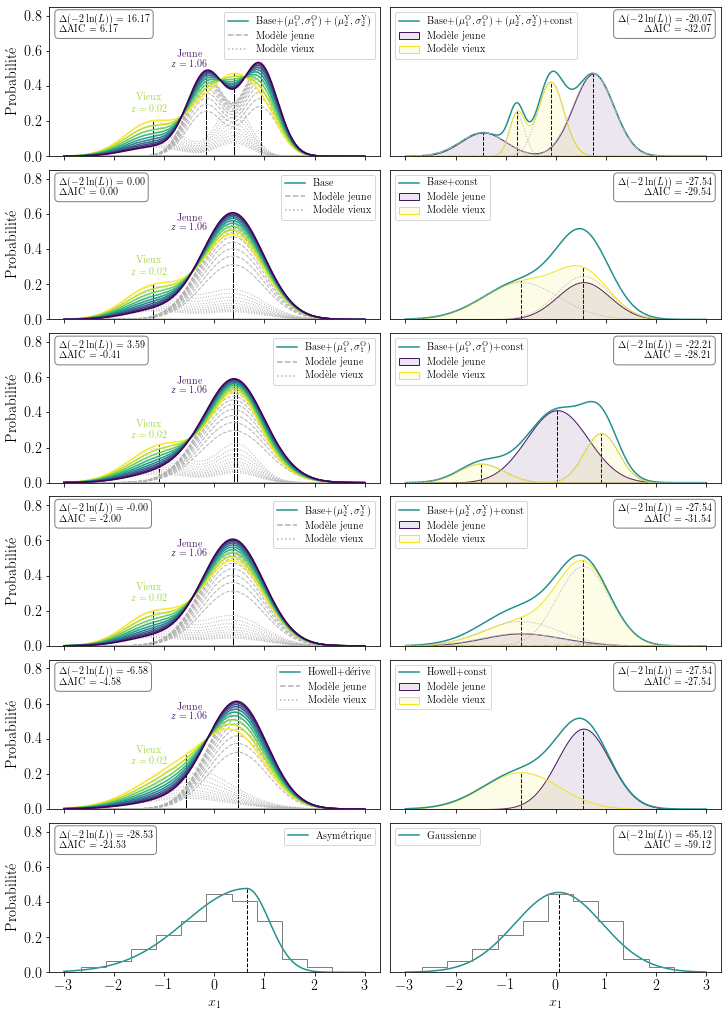

In [41]:
fig = plt.figure(figsize=[10, 14], constrained_layout=True)
gs = fig.add_gridspec(6, 2)
axd = gs.subplots(sharex='col')

mod_left = [evol4G4M4S, evol3G2M2S,
            evol3G3M3S, evol4G2M2S, evol2G2M2S,
            evol1G1M2S]
z = np.mean(df_nc.redshifts)
zlin = np.linspace(df_nc.redshifts.min(),
                   np.max(df_full.loc[df_full['survey'] == 'SNLS'].redshifts), 10)
mod_prop = [{}, {},
            {}, {}, {},
            {'show_hist': True}]
mod_righ = [evol4G4M4SF, evol3G2M2SF,
            evol3G3M3SF, evol4G2M2SF, evol2G2M2SF,
            evol1G1M1S]
leg_r = {'loc': 'upper left', 'fontsize': 'medium'}
leg_l = {'loc': 'upper right', 'fontsize': 'medium'}
font_dict = {'fontsize': 'medium'}
box_prop = dict(facecolor='none', boxstyle='round', pad=0.4, alpha=0.5)
ymax = []

for i, mod, ax, prop in zip(range(6), mod_left, axd[:,0], mod_prop):
    if i == 5:
        mod.show_model_tot(ax, color=plt.cm.viridis(0.5),
                           leg_kwargs=leg_l, **prop)
    else:
        mod.show_model_evol(ax, cmap='viridis_r', zlin=zlin, **prop)
        for z in zlin:
            mod.show_model(ax,
                           y_factor=mod.delta(z), o_factor=(1-mod.delta(z)),
                           ls_o=':', ls_y='--',
                           edgecolor_o='0.7', edgecolor_y='0.7',
                           facecolor_o='none', facecolor_y='none', legend=False)
        ax.text(-1.3, 0.3, f'Vieux\n$z={zlin.min():.2f}$',
                color=plt.cm.viridis(0.85),
                ha='center', va='center',
                **font_dict)
        ax.text(-0.5, 0.55, f'Jeune\n$z={zlin.max():.2f}$',
                color=plt.cm.viridis(0.05),
                ha='center', va='center',
                **font_dict)
        handle = [Line2D([0], [0], color=plt.cm.viridis(0.5)),
                  Line2D([0], [0], color='0.7', ls='--'),
                  Line2D([0], [0], color='0.7', ls=':')]
        legend = [mod.__doc__, 'Modèle jeune', 'Modèle vieux']
        ax.legend(handle, legend, **leg_l)
    s = f'$\Delta(-2\ln(L))$ = {evol3G2M2S.get_logl()-mod.get_logl():.2f}\n' +\
                f'$\Delta$AIC = {evol3G2M2S.get_aic()-mod.get_aic():.2f}' 
    ax.text(0.03, 0.95, s,
            ha='left', va='top',
            transform=ax.transAxes,
            **font_dict,
            bbox=box_prop)
    if i < 5:
        ax.set_xlabel('')
    ymax.append(ax.get_ylim()[-1])

for i, mod, ax, prop in zip(range(7), mod_righ, axd[:,1], mod_prop):
    mod.show_model_tot(ax, color=plt.cm.viridis(0.5), leg_kwargs=leg_r, **prop)
    s = f'$\Delta(-2\ln(L))$ = {evol3G2M2S.get_logl()-mod.get_logl():.2f}\n' +\
                f'$\Delta$AIC = {evol3G2M2S.get_aic()-mod.get_aic():.2f}' 
    ax.text(0.97, 0.95, s,
            ha='right', va='top',
            transform=ax.transAxes,
            **font_dict,
            bbox=box_prop)
    ax.set_ylabel('')
    if i < 5:
        ax.set_xlabel('')
    ax.set_yticks([])
    ymax.append(ax.get_ylim()[-1])

for ax in axd.ravel():
    # ax.set_ylim(top=np.max(ymax))
    ax.set_ylim(top=0.85)

fig.savefig(f'../../../Images/pdf/model_all_evol.pdf', bbox_inches='tight')
# fig.savefig(f'../../../Images/pdf/model_all_evol-cons.pdf', bbox_inches='tight')

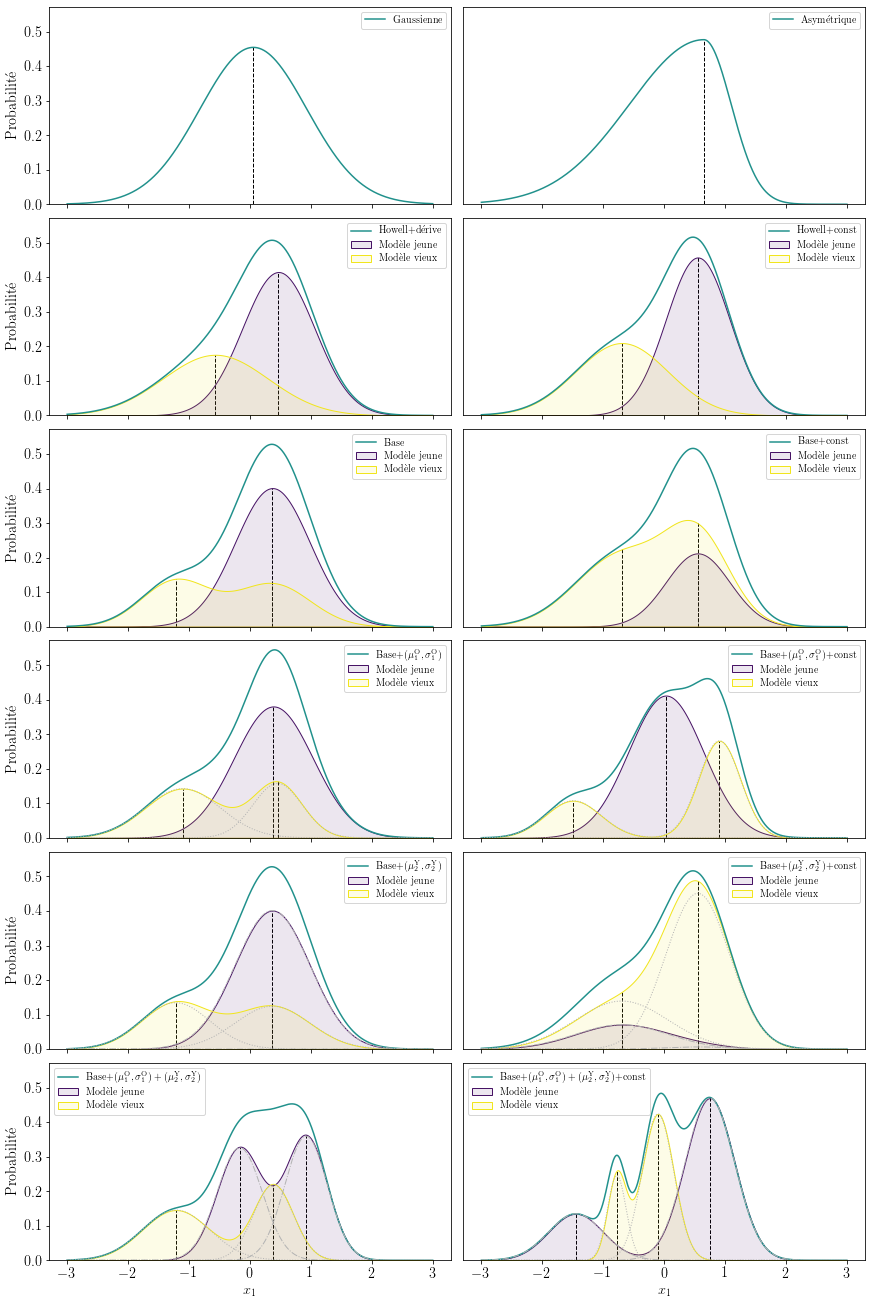

In [17]:
fig = plt.figure(figsize=[12, 18], constrained_layout=True)
gs = fig.add_gridspec(6, 2)
axd = gs.subplots(sharex='col')

mod_left = [evol1G1M1S,
            evol2G2M2S, evol3G2M2S, evol3G3M3S, evol4G2M2S, evol4G4M4S]
z = np.mean(df_nc.redshifts)
mod_prop = [{},
           {'z': z}, {'z': z, 'gauss': False}, {'z': z}, {'z': z}, {'z': z}, {'z': z}]
mod_righ = [evol1G1M2S,
            evol2G2M2SF, evol3G2M2SF, evol3G3M3SF, evol4G2M2SF, evol4G4M4SF]
ymax = []

for i, mod, ax, prop in zip(range(6), mod_left, axd[:,0], mod_prop):
    mod.show_model_tot(ax, color=plt.cm.viridis(0.5), **prop)
    if i < 5:
        ax.set_xlabel('')
    ymax.append(ax.get_ylim()[-1])

for i, mod, ax, prop in zip(range(6), mod_righ, axd[:,1], mod_prop):
    mod.show_model_tot(ax, color=plt.cm.viridis(0.5), **prop)
    ax.set_ylabel('')
    if i < 5:
        ax.set_xlabel('')
    ax.set_yticks([])
    ymax.append(ax.get_ylim()[-1])

for ax in axd.ravel():
    ax.set_ylim(top=np.max(ymax))

# fig.savefig(f'../../../Images/pdf/model_all_{z:.2f}.pdf', bbox_inches='tight')

In [22]:
modèles = [evol3G2M2Sz, evol3G3M3Sz, evol2G2M2Sz,
           evol1G1M2S, evol2G2M2SFz, evol3G2M2SFz,
           evol1G1M1S]

d_mod_comp = pd.DataFrame({'Name': [k.__doc__ for k in modèles[:-1]] +
                               ['Asym par échant'] +
                               [k.__doc__ for k in modèles[-1:]],
                           'Fixed': [k.FIXED for k in modèles[:-1]] +
                               ['True'] +
                               [k.FIXED for k in modèles[-1:]],
                           'Free param': [len(k.FREEPARAMETERS) for k in modèles[:-1]] +
                               ['3x5'] +
                               [len(k.FREEPARAMETERS) for k in modèles[-1:]],
                           '$\mathcal{L}$': [round(k.get_logl(),1) for k in modèles[:-1]] +
                               [1083.6 if tools_ar.cons.value else 1468.2] +
                               [round(k.get_logl(),1) for k in modèles[-1:]],
                           'AIC': [round(k.get_aic(),1) for k in modèles[:-1]] +
                               [1113.6 if tools_ar.cons.value else 1498.2] +
                               [round(k.get_aic(),1) for k in modèles[-1:]],
                           '$\Delta$ AIC': [round(evol3G2M2Sz.get_aic()-k.get_aic(),1)
                                            for k in modèles[:-1]] +
                               [-5.2 if tools_ar.cons.value else -10.9] +
                               [round(evol3G2M2Sz.get_aic()-k.get_aic(),1)
                                    for k in modèles[-1:]],
                           'Proba': [get_proba(k) for k in modèles[:-1]] +
                               [5.7e-6 if tools_ar.cons.value else 1.5e-7] +
                               [get_proba(k) for k in modèles[-1:]]
                          })

path = '../../../Data/tables/main_comp/df_comparaison_zonly'
if tools_ar.cons.value:
    path += '_cons'
path += '.dat'
#d_mod_comp.to_csv(path)

d_mod_comp

,Name,Fixed,Free param,$\mathcal{L}$,AIC,$\Delta$ AIC,Proba
0,Base,False,5,1477.8,1487.8,0.0,1.000000e+00
1,"Base$+(\mu_1^{\mathrm{O}}, \sigma_1^{\mathrm{O...",False,7,1476.7,1490.7,-2.9,2.363947e-01
2,Howell+drift,False,4,1479.3,1487.3,0.5,1.304006e+00
3,Asymmetric,True,3,1485.2,1491.2,-3.4,1.841515e-01
4,Howell+const,True,5,1484.2,1494.2,-6.4,4.096600e-02
5,Base+const,True,6,1484.2,1496.2,-8.4,1.507041e-02
6,Asym par échant,True,3x5,1468.2,1498.2,-10.9,1.500000e-07
7,Gaussian,True,2,1521.8,1525.8,-38.0,5.677308e-09


## Get random samples the size of the conservative one

In [41]:
indexes = {survey: list(df_nc[df_nc['survey'] == survey].index)
           for survey in surveysnl[1:-1]}
todrop_len = {survey: len(df_nc[df_nc['survey'] == survey]) - \
                      len(df_c[df_c['survey'] == survey])
             for survey in surveysnl[1:-1]}

In [54]:
df_c_list = []
for i in range(200):
    todrop_dict = {survey: random.sample(indexes[survey],
                                         todrop_len[survey])
                   for survey in surveysnl[1:-1]}
    todrop = list(todrop_dict.values())[0] + \
             list(todrop_dict.values())[1] + \
             list(todrop_dict.values())[2]
    df_c_list.append(df_nc.drop(todrop))

In [86]:
pickle.dump(df_c_list, open('../../../Data/sne/df_redu', 'wb'))

## Minimize models using these samples

In [79]:
models_name = ['Evol3G2M2S', 'Evol2G2M2S', 'Evol1G1M2S', 'Evol3G2M2SF']
models_list = {name: [] for name in models_name}
models_AIC = {name: [] for name in models_name}
gen = stretchevol.generic()
for k in range(4):
    gen.set_model(models_name[k])
    for i in range(200):
        models_list[models_name[k]].append(gen.fit(df_c_list[i]))

for k in range(4):
    for i in range(200):
        models_AIC[models_name[k]].append(models_list[models_name[0]][i].get_aic() -
                                          models_list[models_name[k]][i].get_aic())

/home/nicolas/.installs/anaconda3/lib/python3.7/site-packages/variaIa-0.8.4-py3.7.egg/variaIa/stretchevol.py:749: RuntimeWarning: invalid value encountered in log
  mu_2, sigma_2)))


## Comparison dataframes

### Be sure of get_proba

In [69]:
def get_proba(model):
    return np.exp((evol3G2M2S.get_aic() - model.get_aic())/2)

### 4 models true one

In [77]:
modèles = [evol3G2M2S, evol2G2M2S,
           evol1G1M2S, evol3G2M2SF]

d_mod_comp = pd.DataFrame({'Name': [k.__doc__ for k in modèles], 
                           'Fixed': [k.FIXED for k in modèles],
                           'Free param': [len(k.FREEPARAMETERS) for k in modèles],
                           '$\mathcal{L}$': [round(k.get_logl(),1) for k in modèles],
                           'AIC': [round(k.get_aic(),1) for k in modèles],
                           '$\Delta$ AIC': [round(evol3G2M2S.get_aic()-k.get_aic(),1) for k in modèles],
                           'Proba': [get_proba(k) for k in modèles],
                          })
 
path = '../../../Data/tables/main_comp/df_comparaison_4mod'
if tools.cons.value:
    path += '_cons'
path += '.dat'
#d_mod_comp.to_csv(path)

#### Save 4 models tests ones

In [83]:
for i in range(200):
    modèles = [models_list[k][i] for k in models_name]
    d_mod_comp = pd.DataFrame({'Name': [k.__doc__ for k in modèles],
                               'Fixed': [k.FIXED for k in modèles],
                               'Free param': [len(k.FREEPARAMETERS) for k in modèles],
                               '$\mathcal{L}$': [round(k.get_logl(),1) for k in modèles],
                               'AIC': [round(k.get_aic(),1) for k in modèles],
                               '$\Delta$ AIC': [round(modèles[0].get_aic()-k.get_aic(),1) for k in modèles],
                               'Proba': [get_proba(k) for k in modèles],
                              })

    path = f'../../../Data/tables/main_comp/df_comparaison_4mod_{i}.dat'
    d_mod_comp.to_csv(path)

In [84]:
d_mod_comp

,Name,Fixed,Free param,$\mathcal{L}$,AIC,$\Delta$ AIC,Proba
0,Base,False,5,1080.9,1090.9,0.0,4.971085e-01
1,Howell+drift,False,4,1087.5,1095.5,-4.6,5.019025e-02
2,Asymmetric,True,3,1108.9,1114.9,-24.0,3.053724e-06
3,Base+const,True,6,1108.8,1120.8,-29.9,1.637083e-07
